In [3]:
%matplotlib inline

<br>
<br>

# Histograms in matplotlib

# Sections

- [Simple histograms](#Simple-histograms)

    - [Fixed bin size](#Fixed-bin-size)
    
    - [Fixed number of bins](#Fixed-number-of-bins)

- [Histogram of 2 overlapping data sets](#Histogram-of-2-overlapping-data-sets)

- [Histogram showing bar heights but without area under the bars](#Histogram-showing-bar-heights-but-without-area-under-the-bars)

<br>
<br>

<br>
<br>

# Simple histograms

[[back to top](#Sections)]

<br>
<br>

### Fixed bin size

[[back to top](#Sections)]

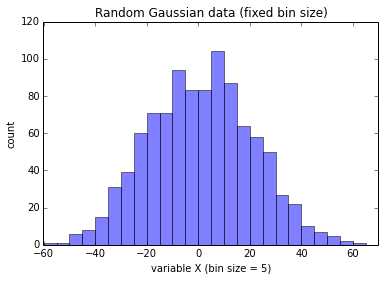

In [26]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = np.random.normal(0, 20, 1000) 

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

<br>
<br>

### Fixed number of bins

[[back to top](#Sections)]

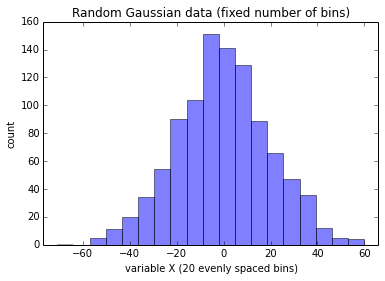

In [30]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

data = np.random.normal(0, 20, 1000) 

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   20) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()

<br>
<br>

# Histogram of 2 overlapping data sets

[[back to top](#Sections)]

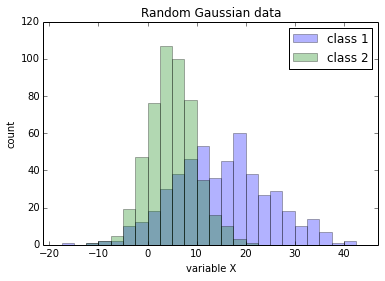

In [4]:
import numpy as np
import random
from matplotlib import pyplot as plt

data1 = [random.gauss(15,10) for i in range(500)]  
data2 = [random.gauss(5,5) for i in range(500)]  
bins = np.arange(-60, 60, 2.5)
plt.xlim([min(data1+data2)-5, max(data1+data2)+5])

plt.hist(data1, bins=bins, alpha=0.3, label='class 1')
plt.hist(data2, bins=bins, alpha=0.3, label='class 2')
plt.title('Random Gaussian data')
plt.xlabel('variable X')
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()

In [32]:
smooth = interp1d(bins, y, kind='cubic')

In [33]:
smooth

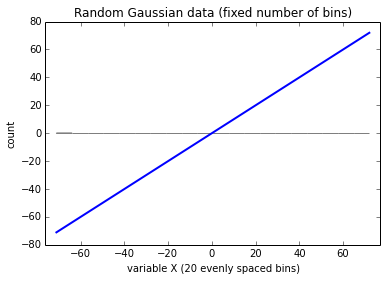

In [35]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.interpolate import interp1d

data = np.random.normal(0, 20, 10000) 

# plotting the histogram
n, bins, patches = plt.hist(data, bins=20, normed=1, alpha=0.5, color='lightblue')

# fitting the data
mu, sigma = norm.fit(data)

# adding the fitted line
y = mlab.normpdf(bins, mu, sigma)
interp = interp1d(bins, y, kind='cubic')
plt.plot(bins, interp(y), linewidth=2, color='blue')

plt.xlim([min(data)-5, max(data)+5])
plt.title('Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()

<br>
<br>

# Histogram showing bar heights but without area under the bars

[[back to top](#Sections)]

The line plot below is using bins of a histogram and is particularly useful if you are working with many different overlapping data sets.

In [33]:
# Generate a random Gaussian dataset with different means
# 5 rows with 30 columns, where every row represents 1 sample.
import numpy as np

data = np.ones((5,30))
for i in range(5):
    data[i,:] = np.random.normal(loc=i/2, scale=1.0, size=30)

Via the `numpy.histogram` function, we can categorize our data into distinct bins.

In [34]:
from math import floor, ceil # for rounding up and down

data_min = floor(data.min()) # minimum val. of the dataset rounded down
data_max = floor(data.max()) # maximum val. of the dataset rounded up

bins_size = 0.5
bins = np.arange(floor(data_min), ceil(data_max), bin_size)
np.histogram(data[0,:], bins=bins)

(array([0, 5, 4, 9, 4, 6, 1, 1, 0]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]))

The [`numpy.histogram`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) function returns a tuple, where the first value is an array of how many samples fall into the first bin, the second bin, and so forth.  
The second value is another NumPy array; it contains the specified bins. Note that all bins but the last one are half open intervals, e.g., the first bin would be `[-2, -1.5)` (including -2, but not including -1.5), and the second bin would be `[-1.5,  -1.)` (including -1.5, but not including 1.0). But the last bin is defined as `[2., 2.5]` (including 2 and including 2.5).

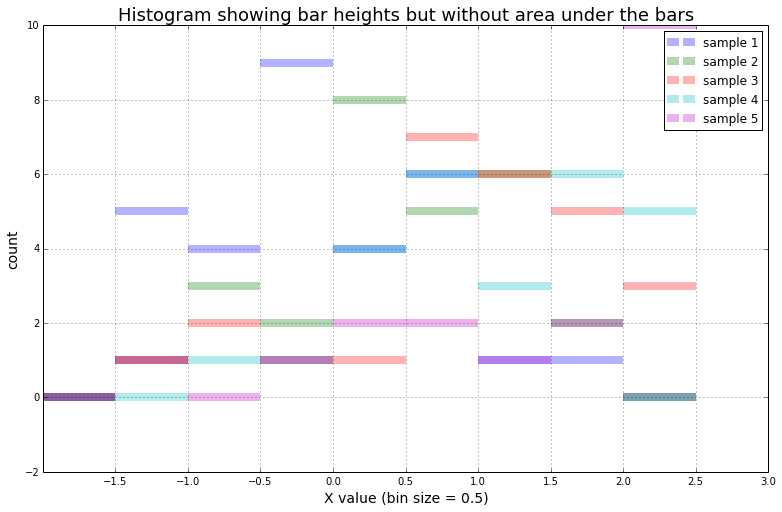

In [57]:
from matplotlib import pyplot as plt

markers = ['^', 'v', 'o', 'p', 'x', 's', 'p', ',']

plt.figure(figsize=(13,8))


for row in range(data.shape[0]):
    hist = np.histogram(data[row,:], bins=bins)
    plt.errorbar(hist[1][:-1] + bin_size/2, 
             hist[0],  
             alpha=0.3,
             xerr=bin_size/2,
             capsize=0,
             fmt=None,
             linewidth=8,
             )

plt.legend(['sample %s'%i for i in range(1, 6)])
plt.grid()


plt.title('Histogram showing bar heights but without area under the bars', fontsize=18)
plt.ylabel('count', fontsize=14)
plt.xlabel('X value (bin size = %s)'%bin_size, fontsize=14)

plt.xticks(bins + bin_size)

plt.show()